# 목표
## 1. DSA Data를 활용해서
## 2. 순환 데이터로 변형한 후 split.sequence
## 3. Transformer encoder로 분류하기

# 0) 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers

# 1) 데이터 읽기

In [2]:
df = pd.read_csv('./DSA_features.csv')

df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


# 2) EDA 실행

In [3]:
df.shape

(9120, 272)

## 2-1) 결측치 확인, 제거

In [ ]:
# 결측치 확인
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [5]:
df.isnull().values.any()

False

## 2-2) 레이블 확인

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

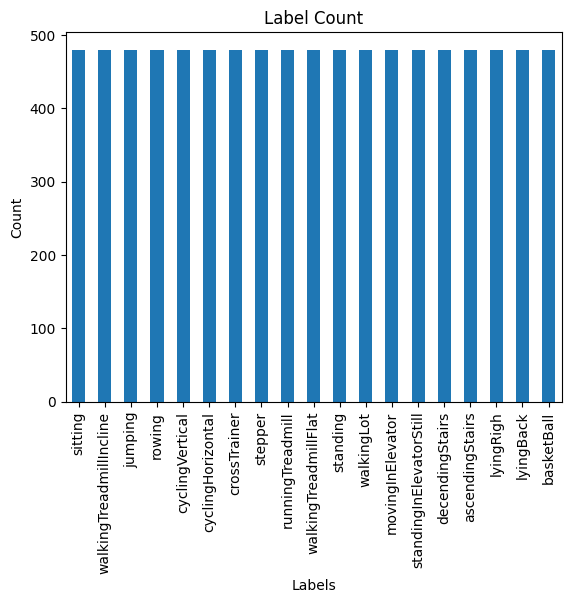

In [6]:
# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

df['activity'].value_counts()

Text(0, 0.5, 'Count')

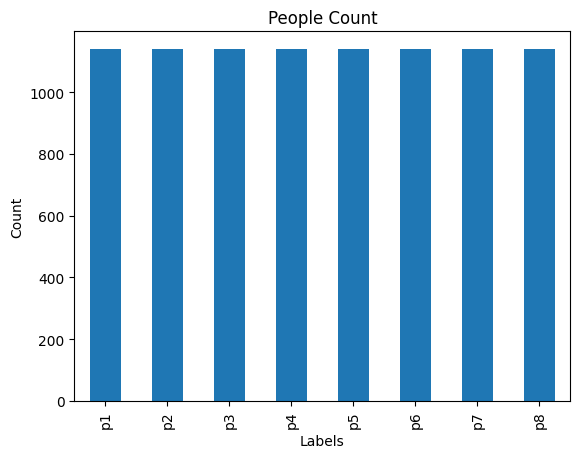

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['people'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('People Count')
plt.xlabel('Labels')
plt.ylabel('Count')

## 2-3) 데이터 및 레이블 인코딩

activity를 레이블 인코딩해줌

In [8]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()


# 'label' 컬럼을 숫자로 변환
df['activity'] = label_encoder.fit_transform(df['activity'])

df['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

시계열 데이터(Timeseries Data)를 (Samples, Time_steps, Features)로 이루어진 3차원 데이터로 구성한다면  
같은 people의 같은 activity를 가진 features를 50개의 time_step으로 합친 시계열 데이터를 한개의 row로 가진 dataframe을 만들어보고싶었다.

# 3) X, Y 나누기

아래 코드는 chatGPT에서 가져와 수정을 거침

In [9]:
time_step = 50

# 최종 시계열 데이터셋 초기화
time_series_data = []
y_data = []  # Y 데이터 초기화

# person과 activity를 제외한 피처 추출
features = df.drop(columns=['people', 'activity'])

# 'person'과 'activity'를 기준으로 그룹화
grouped = df.groupby(['people', 'activity'])

# 각 그룹에 대해 데이터를 numpy 배열로 변환
for name, group in grouped:
    # 그룹의 피처 데이터 가져오기
    feature_data = group.drop(columns=['people', 'activity']).values
    for i in range(len(feature_data)) :
        end_idx = i + time_step
        if end_idx < len(feature_data) :
            time_series_data.append(feature_data[i:end_idx])
            y_data.append(int(group['activity'].values.mean()))
            print("y_data inputed", int(group['activity'].values.mean()))



y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 0
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 1
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 2
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 3
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 4
y_data inputed 5
y_data inputed 5
y_data inputed 5
y_data inputed 5
y_data inputed 5
y_data inputed 5
y_data inputed 5
y_data inputed 5
y_data inputed

In [10]:
# 모든 샘플을 numpy array로 변환
time_series_data = np.array(time_series_data)
y_data = np.array(y_data)

# 5. 결과 확인
print(time_series_data.shape)
print(y_data.shape)

(1520, 50, 270)
(1520,)


# 4) Train데이터, Test데이터 나누기

In [11]:
RANDOM_SEED = 32

# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(time_series_data, y_data, test_size = 0.2, random_state = RANDOM_SEED)

# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train.shape


(1216, 50, 270)

In [12]:
Y_train.shape

(1216,)

In [13]:
n_classes = len(np.unique(Y_train))

idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
Y_train = Y_train[idx]

In [14]:
Y_train.shape

(1216,)

# 4) Model 정의하기

In [15]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [16]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=1,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50, 270)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 270)   │  1,109,262 │ input_layer[0][0… │
│ (MultiHeadAttentio… │                   │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 50, 270)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 50, 270)   │        540 │ dropout_1[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 50, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 50, 4)     │      1,084 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 50, 4)     │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 50, 270)   │      1,350 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 270)   │        540 │ conv1d_1[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 50, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 270)       │          0 │ add_1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     34,688 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 19)        │      2,451 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,149,915 (4.39 MB)

 Trainable params: 1,149,915 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

# 7) 학습, 예측

In [17]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(X_test, Y_test, verbose=1)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 50, 270)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 270)   │  1,109,262 │ input_layer_1[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 50, 270)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 270)   │        540 │ dropout_5[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 50, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 50, 4)     │      1,084 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 50, 4)     │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 50, 270)   │      1,350 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 270)   │        540 │ conv1d_3[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 50, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 270)   │  1,109,262 │ add_3[0][0],      │
│ (MultiHeadAttentio… │                   │            │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 50, 270)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 270)   │        540 │ dropout_8[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 50, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 50, 4)     │      1,084 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 50, 4)     │          0 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 50, 270)   │      1,350 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 270)   │        540 │ conv1d_5[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 50, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,488,243 (17.12 MB)

 Trainable params: 4,488,243 (17.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 921ms/step - loss: 10.1864 - sparse_categorical_accuracy: 0.1908 - val_loss: 1.9103 - val_sparse_categorical_accuracy: 0.5779
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 877ms/step - loss: 4.4594 - sparse_categorical_accuracy: 0.5075 - val_loss: 0.7909 - val_sparse_categorical_accuracy: 0.7213
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 875ms/step - loss: 2.7448 - sparse_categorical_accuracy: 0.6160 - val_loss: 0.4983 - val_sparse_categorical_accuracy: 0.8443
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 888ms/step - loss: 1.8849 - sparse_categorical_accuracy: 0.6933 - val_loss: 0.4623 - val_sparse_categorical_accuracy: 0.8566
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 901ms/step - loss: 1.0180 - sparse_categorical_accuracy: 0.7324 - val_loss: 0.2844 - val_sparse_categorical_accuracy: 0.8689
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 879ms/step - loss: 0.9680 - sparse_categorical_accuracy: 0.7735 - val_loss: 0.2186 - val_sparse_categorical_accuracy

[1.4064778042666148e-05, 1.0]

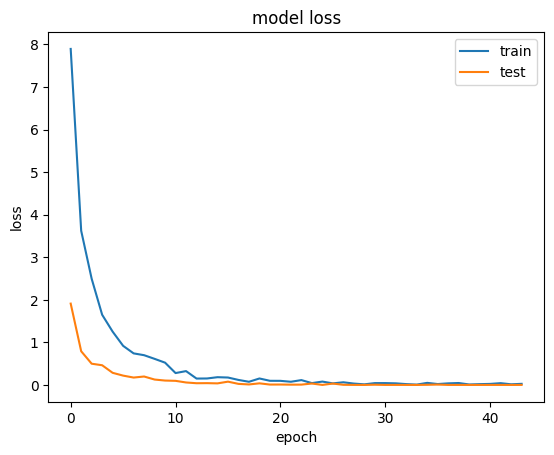

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


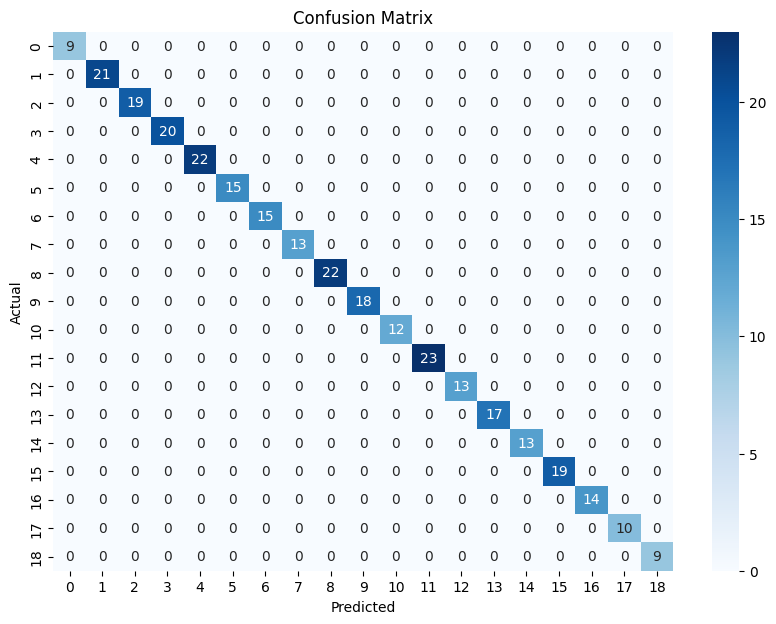

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        14
          17       1.00    

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)

# 혼동 행렬
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 성능 보고서
print(classification_report(Y_test, y_pred))